# How to Automate Data Wrangling with AI

In this tutorial, we will learn how to automate data wrangling with using the Data Wrangling Agent. The Data Wrangling Agent is a tool that uses AI to automate the data wrangling process. It is a powerful tool that can save you time and effort when working with many large datasets.

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)


# Table of Contents

1. [How to Automate Data Wrangling with AI](#how-to-automate-data-wrangling-with-ai)
2. [Load Libraries](#load-libraries)
3. [Setup AI and Logging](#setup-ai-and-logging)
4. [Load a Dataset](#load-a-dataset)
5. [Create The Agent](#create-the-agent)
6. [Response](#response)
    1. [The data wrangling steps that were performed](#the-data-wrangling-steps-that-were-performed)
    2. [Data Wrangling Function](#data-wrangling-function)
    3. [Wrangled Data As Pandas Data Frame](#wrangled-data-as-pandas-data-frame)
7. [Free Generative AI Data Science Workshop](#free-generative-ai-data-science-workshop)

### Load Libraries

In [1]:
# * Libraries

from langchain_openai import ChatOpenAI
import os
import yaml
import pandas as pd
from pprint import pprint

from ai_data_science_team.agents import DataWranglingAgent

### Setup AI and Logging

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)

llm


ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x1199c9a80>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x128453220>, root_client=<openai.OpenAI object at 0x1199c9750>, root_async_client=<openai.AsyncOpenAI object at 0x128453160>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

### Load a Dataset

Imagine that we have a directory full of datasets that need to be merged. We can use the AI to generate the code to merge the datasets.

In [3]:
# Simulate multiple CSV files with a common ID that can be joined

df1 = pd.DataFrame({
    "ID": [1, 2, 3, 4],
    "Name": ["John", "Jane", "Jim", "Jill"]
})

df2 = pd.DataFrame({
    "ID": [1, 2, 3, 4],
    "Age": [25, 30, 35, 40]
})

df3 = pd.DataFrame({
    "ID": [1, 2, 3, 4],
    "Education": ["Bachelors", "Masters", "PhD", "MBA"]
})

### Create The Agent

Run this code to create the agent with `DataWranglingAgent()`.

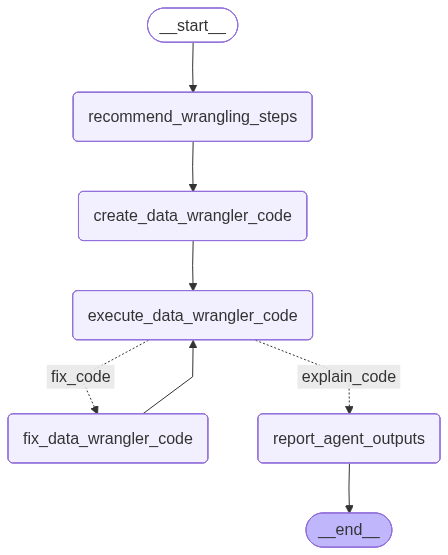

In [4]:
data_wrangling_agent = DataWranglingAgent(
    model = llm, 
    log=LOG, 
    log_path=LOG_PATH
)

data_wrangling_agent

The main inputs to the Data Wrangling Agent are:

- **user_instructions**: The agent will use these comments modify the data wrangling operations. 
- **data_raw**: The raw data to have data wrangling performed.
  - **Dictionary**: Used for a singled dataset to be wrangled. 
  - **List of Dictionaries**: Used for multiple datasets that need to be merged or concatenated.
- **max_retries**: Used to limit the number of attempts to fix the python code generated by the agent. Set this to 3 to limit to 3 attempts. 
- **retry_count**: Set this to 0. 

In [5]:
data_wrangling_agent.invoke_agent(
    data_raw= [df1, df2, df3],
    user_instructions="Merge the data frames on the ID column", 
    max_retries=3, 
    retry_count=0
)

---DATA WRANGLING AGENT----
    * RECOMMEND WRANGLING STEPS
---DATA WRANGLING AGENT----
    * CREATE DATA WRANGLER CODE
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/data_wrangler.py
    * EXECUTE DATA WRANGLER CODE (SANDBOXED)
    * REPORT AGENT OUTPUTS


### Response

The response produced contains everything we need to understand the data wrangling decisions made and get the wrangled dataset. 

In [6]:
response = data_wrangling_agent.get_response()

list(response.keys())

['messages',
 'user_instructions',
 'recommended_steps',
 'data_raw',
 'data_wrangled',
 'all_datasets_summary',
 'data_wrangler_function',
 'data_wrangler_function_path',
 'data_wrangler_function_name',
 'data_wrangler_error',
 'data_wrangler_error_log_path',
 'data_wrangling_summary',
 'max_retries',
 'retry_count']

#### Data Wrangled

In [7]:
data_wrangling_agent.get_data_wrangled()

,ID,Name,Age,Education
0,1,John,25,Bachelors
1,2,Jane,30,Masters
2,3,Jim,35,PhD
3,4,Jill,40,MBA


#### Data Wrangling Function

In [8]:
data_wrangling_agent.get_data_wrangler_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_wrangling_agent
# Time Created: 2025-12-08 20:13:47

def data_wrangler(data_list):
    import pandas as pd
    import numpy as np
    '''
    Wrangle the data provided in data.
    
    data_list: A list of one or more pandas data frames containing the raw data to be wrangled.
    '''


    # Ensure the incoming data is in list format
    if not isinstance(data_list, list):
        data_list = [data_list]
        
    # Load datasets from the provided list
    # Expecting three datasets based on the user instructions
    dataset_1 = data_list[0]
    dataset_2 = data_list[1]
    dataset_3 = data_list[2]

    # Step 2: Merge dataset_1 and dataset_2 on the ID column using an inner join
    merged_df_1 = pd.merge(dataset_1, dataset_2, on='ID', how='inner')

    # Step 3: Merge the result with dataset_3 on the ID column using an inner join
    final_merged_df = pd.merge(merged_df_1, dataset_3, on='ID', how='inner')

    # Step 4: Verify the structure of the final merged data frame
    # This has been done by ensuring all columns from original are included

    # Step 5 (optional): Review the first few rows of the final merged data frame
    # However, since we need to return only the final DataFrame, we won't execute it here

    # Return the final merged DataFrame
    return final_merged_df
```

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)